In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas
from scipy import stats
from numpy import matlib
import matplotlib.path as mpath
import matplotlib.ticker as mticker 
import cartopy.crs as ccrs
import cartopy.feature as cf
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import mlab
from scipy import integrate
import matplotlib.gridspec as gridspec

# Read U at 850 hPa

In [ ]:
%cd -b sw054
sw054 = xr.open_dataset('FOCI1.4-SW054_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw054 = sw054.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31')).mean(dim='lon')
%cd -b sw064
sw064 = xr.open_dataset('FOCI1.4-SW064_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw064 = sw064.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31')).mean(dim='lon')
%cd -b sw065
sw065 = xr.open_dataset('FOCI1.4-SW065_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw065 = sw065.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31')).mean(dim='lon')

(bookmark:sw054) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6


In [ ]:
%cd -b sw060
sw060 = xr.open_dataset('FOCI1.7-SW060_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw060 = sw060.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31')).mean(dim='lon')
%cd -b sw061
sw061 = xr.open_dataset('FOCI1.7-SW061_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw061 = sw061.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31')).mean(dim='lon')
%cd -b jh019
jh019 = xr.open_dataset('FOCI1.9.4-JH019_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
jh019 = jh019.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31')).mean(dim='lon')

In [ ]:
#%cd /sfs/fs1/work-geomar/smomw418/ERA5/
%cd /sfs/fs2/work-geomar7/smomw235/era5/
era_u = xr.open_dataset('E5_1950-2019_U_T63_daymean.nc', decode_times=True)
era = era_u.U.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31')).mean(dim='lon')

In [ ]:
sw054

In [ ]:
era

In [5]:
%cd -b sw054
sw054_map = xr.open_dataset('FOCI1.4-SW054_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw054_map = sw054_map.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw064
sw064_map = xr.open_dataset('FOCI1.4-SW064_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw064_map = sw064_map.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw065
sw065_map = xr.open_dataset('FOCI1.4-SW065_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw065_map = sw065_map.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31'))

(bookmark:sw054) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


In [6]:
%cd -b sw060
sw060_map = xr.open_dataset('FOCI1.7-SW060_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw060_map = sw060_map.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw061
sw061_map = xr.open_dataset('FOCI1.7-SW061_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw061_map = sw061_map.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31'))
%cd -b jh019
jh019_map = xr.open_dataset('FOCI1.9.4-JH019_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
jh019_map = jh019_map.u.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31'))

(bookmark:sw060) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


In [7]:
#%cd /sfs/fs1/work-geomar/smomw418/ERA5/
%cd /sfs/fs2/work-geomar7/smomw235/era5/
era_map = xr.open_dataset('E5_1950-2019_U_T63_daymean.nc', decode_times=True)
era_map = era_map.U.sel(plev=85000, lat=slice(0,-90), time=slice('1958-01-01', '2002-12-31'))

/sfs/fs2/work-geomar7/smomw235/era5


In [8]:
sw064 = sw064.assign_coords(lat=sw054.lat)
sw065 = sw065.assign_coords(lat=sw054.lat)
sw064_map = sw064_map.assign_coords(lat=sw054.lat)
sw065_map = sw065_map.assign_coords(lat=sw054.lat)

## Compute U trend at 850 hPa and its significance for each calendar day and latitude

In [9]:
def mann_kendall(data):
    
    time = data.year
    lat = data.lat
    day = data.day
    trend = xr.DataArray(np.zeros((len(lat), len(day))), dims=['lat', 'day'], coords = [lat, day])
    
    for i in range(0, len(time)-1):
        val = data.sel(year=time[i]) # select each value in the array
        sign = xr.where(data>val, 1, 2) # put 1 where following values are greater than val
        sign = xr.where(data<val, -1, sign) # put -1 where following values are smaller than val
        sign = xr.where(data==val, 0, sign) # put 0 where following values are equal to val
        trend = trend + sign[:,i+1::,:].sum(dim='year')
        no_equal = sign.where(sign==0).count(dim='year')-1
        
    # Compute the variance
    var = 1/18*(len(time)*(len(time)-1)*(2*len(time)+5))
    
    # Compute the normalized test statistic
    z = xr.where(trend>0, (trend-1)/np.sqrt(var), 0)
    z = xr.where(trend<0, (trend+1)/np.sqrt(var), z)
    
    # Compute the probability associated with the test statistic
    p = 1/np.sqrt(2*np.pi)*np.exp(z**2/(-2))
    
    # Form array with 1 where the trend is significant and 0 elsewhere
    signif = xr.where(p<0.05, 1, 0)
    
    return signif

In [10]:
def sel_days(data):
    def is_day(day, d, month, m):
        return (day==d) & (month==m) # returns an array with true where the day of the year is d and false elswhere
    
    # 1st of Janary
    data_out = data.sel(time=is_day(data['time.day'],1, data['time.month'],1)).groupby('time.year').mean(dim='time')

    # January
    for d in range(2,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],1)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # February
    for d in range(1,29):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],2)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # March
    for d in range(1,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],3)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # April
    for d in range(1,31):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],4)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # May
    for d in range(1,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],5)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # June
    for d in range(1,31):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],6)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # July
    for d in range(1,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],7)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # August
    for d in range(1,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],8)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # September
    for d in range(1,31):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],9)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # October
    for d in range(1,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],10)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # November
    for d in range(1,31):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],11)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # December
    for d in range(1,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],12)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    
    day = np.arange(1,366)
    data_out = data_out.assign_coords(day=day)
    
    return data_out

## Ensemble mean trends

In [11]:
def ii_ens_trend_time_lat(data):
       
    # Select the calendar day
    mon = sel_days(data)
    
    # Compute the linear trend using least squares method
    time = mon.year
    t = np.arange(1,len(time)+1)
    trend = np.zeros((len(mon.lat), len(mon.day)))
    for i in range(0, len(mon.lat)):
        for j in range(0, len(mon.day)):
            trend[i,j], _, _, _, _ = stats.linregress(t, mon[j,:,i].values) # linear regression of x from time
            
    trend = xr.DataArray(trend*10, dims=['lat', 'day'], coords=[mon.lat, mon.day])

    # Check the significance using the Mann-Kendall test
    sig = mann_kendall(mon) #1 where the trend is significant and 0 elsewhere

    signif = xr.where(sig==1, trend, np.nan)
    non_sig = xr.where(sig==0, 1, np.nan)
    
    # Compute the time mean for each day
    mean = mon.mean(dim='year')
    
    return trend, signif, mean

In [12]:
def ens_trend(data1, data2, data3):
        
    # Compute the ensemble mean
    ens = xr.concat((data1, data2, data3), dim='exp').mean(dim='exp')
    print('Ensemble mean done')
    
    # Compute the ensemble mean trend and its significance
    trend, signif, mean = ii_ens_trend_time_lat(ens)
    
    return trend, signif, mean

In [13]:
hist_trend, hist_signif, hist_mean = ens_trend(sw060, sw061, jh019)
moz_trend, moz_signif, moz_mean = ens_trend(sw065, sw064, sw054)

Ensemble mean done
Ensemble mean done


In [14]:
era_trend, era_signif, era_mean = ii_ens_trend_time_lat(era)

In [15]:
sw054_trend, sw054_signif, sw054_mean = ii_ens_trend_time_lat(sw054)
sw064_trend, sw064_signif, sw064_mean = ii_ens_trend_time_lat(sw064)
sw065_trend, sw065_signif, sw065_mean = ii_ens_trend_time_lat(sw065)

sw060_trend, sw060_signif, sw060_mean = ii_ens_trend_time_lat(sw060)
sw061_trend, sw061_signif, sw061_mean = ii_ens_trend_time_lat(sw061)
jh019_trend, jh019_signif, jh019_mean = ii_ens_trend_time_lat(jh019)

## Compute U trend map in DJ (the two months both sets of experiments show a significant trend)

In [16]:
def mann_kendall(data):
    
    time = data.time
    lon = data.lon
    lat = data.lat
    trend = xr.DataArray(np.zeros((len(lat), len(lon))), dims=['lat', 'lon'], coords = [lat, lon])
    
    for i in range(0, len(time)-1):
        val = data.sel(time=time[i]) # select each value in the array
        sign = xr.where(data>val, 1, 2) # put 1 where following values are greater than val
        sign = xr.where(data<val, -1, sign) # put -1 where following values are smaller than val
        sign = xr.where(data==val, 0, sign) # put 0 where following values are equal to val
        trend = trend + sign[i+1::,:,:].sum(dim='time')
        no_equal = sign.where(sign==0).count(dim='time')-1
    
    # Compute the variance
    var = 1/18*(len(time)*(len(time)-1)*(2*len(time)+5))
    
    # Compute the normalized test statistic
    z = xr.where(trend>0, (trend-1)/np.sqrt(var), 0)
    z = xr.where(trend<0, (trend+1)/np.sqrt(var), z)
    
    # Compute the probability associated with the test statistic
    p = 1/np.sqrt(2*np.pi)*np.exp(z**2/(-2))
    
    # Form array with 1 where the trend is significant and 0 elsewhere
    signif = xr.where(p<0.05, 1, 0)
    
    return signif

In [31]:
def ii_mon_trend_map(data):
    
    def is_dj(month):
        return (month==1) | (month==12) # returns an array with true where the day of the year is d and false elswhere
    
    data_sel = data.sel(time=slice('1958-12-01', '2002-02-28')) # exclude JF in the first year and D in the last year
    data_dj = data_sel.sel(time=is_dj(data_sel['time.month'])).resample(time='A-NOV').mean(dim='time') # select only DJ (resample year ending in Nov, so that December is part of the next year)
  
    # Compute mean as referance
    mean = data_dj.mean(dim='time')
    
    # Compute the linear trend using least squares method
    def calc_trend(data):
        time = data.time
        t = np.arange(1,len(time)+1)
        trend = np.zeros((len(data.lat), len(data.lon)))
        for j in range(0, len(data.lat)):
            for k in range(0, len(data.lon)):
                trend[j,k], _, _, _, _ = stats.linregress(t, data[:,j,k].values) # linear regression of x from time
            
        trend = xr.DataArray(trend*10, dims=['lat', 'lon'], coords=[data.lat, data.lon])
        
        return trend

    trend = calc_trend(data_dj)
    
    # Check the significance using the Mann-Kendall test
    sig = mann_kendall(data_dj) #1 where the trend is significant and 0 elsewhere

    signif = xr.where(sig==1, trend, np.nan)
    #non_sig = xr.where(sig==0, 1, np.nan)
    
    return trend, signif, mean

In [32]:
def ens_trend_map(data1, data2, data3):
       
    # Compute the ensemble mean
    ens = xr.concat((data1, data2, data3), dim='exp').mean(dim='exp')
    print('Ensemble mean done')
    
    # Compute the ensemble mean trend and its significance
    trend, signif, mean = ii_mon_trend_map(ens)
    
    return trend, signif, mean

In [33]:
moz_trend_map_dj, moz_sign_map_dj, moz_mean_map_dj = ens_trend_map(sw054_map, sw064_map, sw065_map)
hist_trend_map_dj, hist_sign_map_dj, hist_mean_map_dj = ens_trend_map(sw060_map, sw061_map, jh019_map)

Ensemble mean done
Ensemble mean done


In [34]:
sw054_trend_map_dj, sw054_sign_map_dj, sw054_mean_map_dj = ii_mon_trend_map(sw054_map)
sw064_trend_map_dj, sw064_sign_map_dj, sw064_mean_map_dj = ii_mon_trend_map(sw064_map)
sw065_trend_map_dj, sw065_sign_map_dj, sw065_mean_map_dj = ii_mon_trend_map(sw065_map)

sw060_trend_map_dj, sw060_sign_map_dj, sw060_mean_map_dj = ii_mon_trend_map(sw060_map)
sw061_trend_map_dj, sw061_sign_map_dj, sw061_mean_map_dj = ii_mon_trend_map(sw061_map)
jh019_trend_map_dj, jh019_sign_map_dj, jh019_mean_map_dj = ii_mon_trend_map(jh019_map)

In [35]:
era_trend_map_dj, era_sign_map_dj, era_mean_map_dj = ii_mon_trend_map(era_map)

In [22]:
def mon_plev(trend, sign, mean, cont, cont2, title):
    
    # Start on the 1st of July
    trend = xr.concat((trend[:,181::], trend[:,0:181]), dim='day') 
    signn = xr.concat((sign[:,181::], sign[:,0:181]), dim='day')
    mean =  xr.concat((mean[181::,:], mean[0:181,:]), dim='day')
    
    day = np.arange(1,366)
    mon_mark = np.array([15, 46, 77, 107, 138, 168, 199, 230, 258, 289, 319, 350]) # mark the 15th of every month

    con = plt.contourf(day, trend.lat, trend, cont, cmap='RdBu_r', extend='both', hatches=['.'])
    con = plt.contourf(day, trend.lat, signn, cont, cmap='RdBu_r', extend='both')
    cs = plt.contour(day, trend.lat, mean.transpose(), cont2, colors='k')
    plt.clabel(cs, fmt= '%1.0f', fontsize=24, inline=1)
    plt.xlim(day.min(), day.max())
    plt.ylim(-80, -20)
    ax=plt.gca()
    plt.xticks(mon_mark, ('J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M', 'A', 'M', 'J')) # mark the 15th of every month
    plt.yticks([-20,-30,-40,-50,-60,-70,-80])
    ax.tick_params(axis='both', labelsize=28)
    ax.minorticks_on()
    plt.ylabel('Latitude', fontsize=28) 
    plt.title(title, fontsize=28)
    
    return con

In [23]:
def mon_plev2(trend, sign, mean, cont, cont2, title):
    
    # Start on the 1st of July
    trend = xr.concat((trend[:,181::], trend[:,0:181]), dim='day') 
    signn = xr.concat((sign[:,181::], sign[:,0:181]), dim='day')
    mean =  xr.concat((mean[181::,:], mean[0:181,:]), dim='day')
    
    day = np.arange(1,366)
    mon_mark = np.array([15, 46, 77, 107, 138, 168, 199, 230, 258, 289, 319, 350]) # mark the 15th of every month

    con = plt.contourf(day, trend.lat, trend, cont, cmap='RdBu_r', extend='both', hatches=['.'])
    con = plt.contourf(day, trend.lat, signn, cont, cmap='RdBu_r', extend='both')
    cs = plt.contour(day, trend.lat, mean.transpose(), cont2, colors='k')
    plt.clabel(cs, fmt= '%1.0f', fontsize=24, inline=1)
    plt.xlim(day.min(), day.max())
    plt.ylim(-80, -20)
    ax=plt.gca()
    plt.xticks(mon_mark, ()) # mark the 15th of every month
    plt.yticks([-20,-30,-40,-50,-60,-70,-80])
    ax.tick_params(axis='both', labelsize=28)
    ax.minorticks_on()
    plt.ylabel('Latitude', fontsize=28) 
    plt.title(title, fontsize=28)
    
    return con

In [24]:
def polar_plot(trend, sign, mean, cont, cont2, title, ax):

    # Define circle to have a round boundary to the plot
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    # Get lat lon meshgrid and append the last value so that the map has no white spaces 
    lat = trend.lat
    lon = trend.lon
    lon2, lat2 = np.meshgrid(np.append(lon,[360]), np.append(lat,[-90]))

    # Padd with the last row and column to get rid of empty space
    trend = np.pad(trend, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    sign = np.pad(sign, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    mean = np.pad(mean, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    
    #ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180,180,-90,-20], ccrs.PlateCarree()) # needs to be PlateCarree
    ax.add_feature(cf.COASTLINE)
    gl = ax.gridlines(ccrs.PlateCarree()) # needs to be PlateCarree
    gl.xlocator = mticker.FixedLocator([180, 150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150, -180])
    gl.ylocator = mticker.FixedLocator([-80, -60, -40, -20])
    gl.n_steps = 100 # without it the paralels are drwan too coarse and are polygons rather than circles
    ax.set_boundary(circle, transform=ax.transAxes) # creates round boundary

    con1=ax.contourf(lon2, lat2, trend, cont, transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both', hatches=['.'])
    con=ax.contourf(lon2, lat2, sign, cont, transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
    cs=ax.contour(lon2, lat2, mean, cont2, transform=ccrs.PlateCarree(), colors='k')
    plt.clabel(cs, fmt= '%1.0f', fontsize=24, inline=1)
    plt.title(title, fontsize=28)
    
    return con

/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


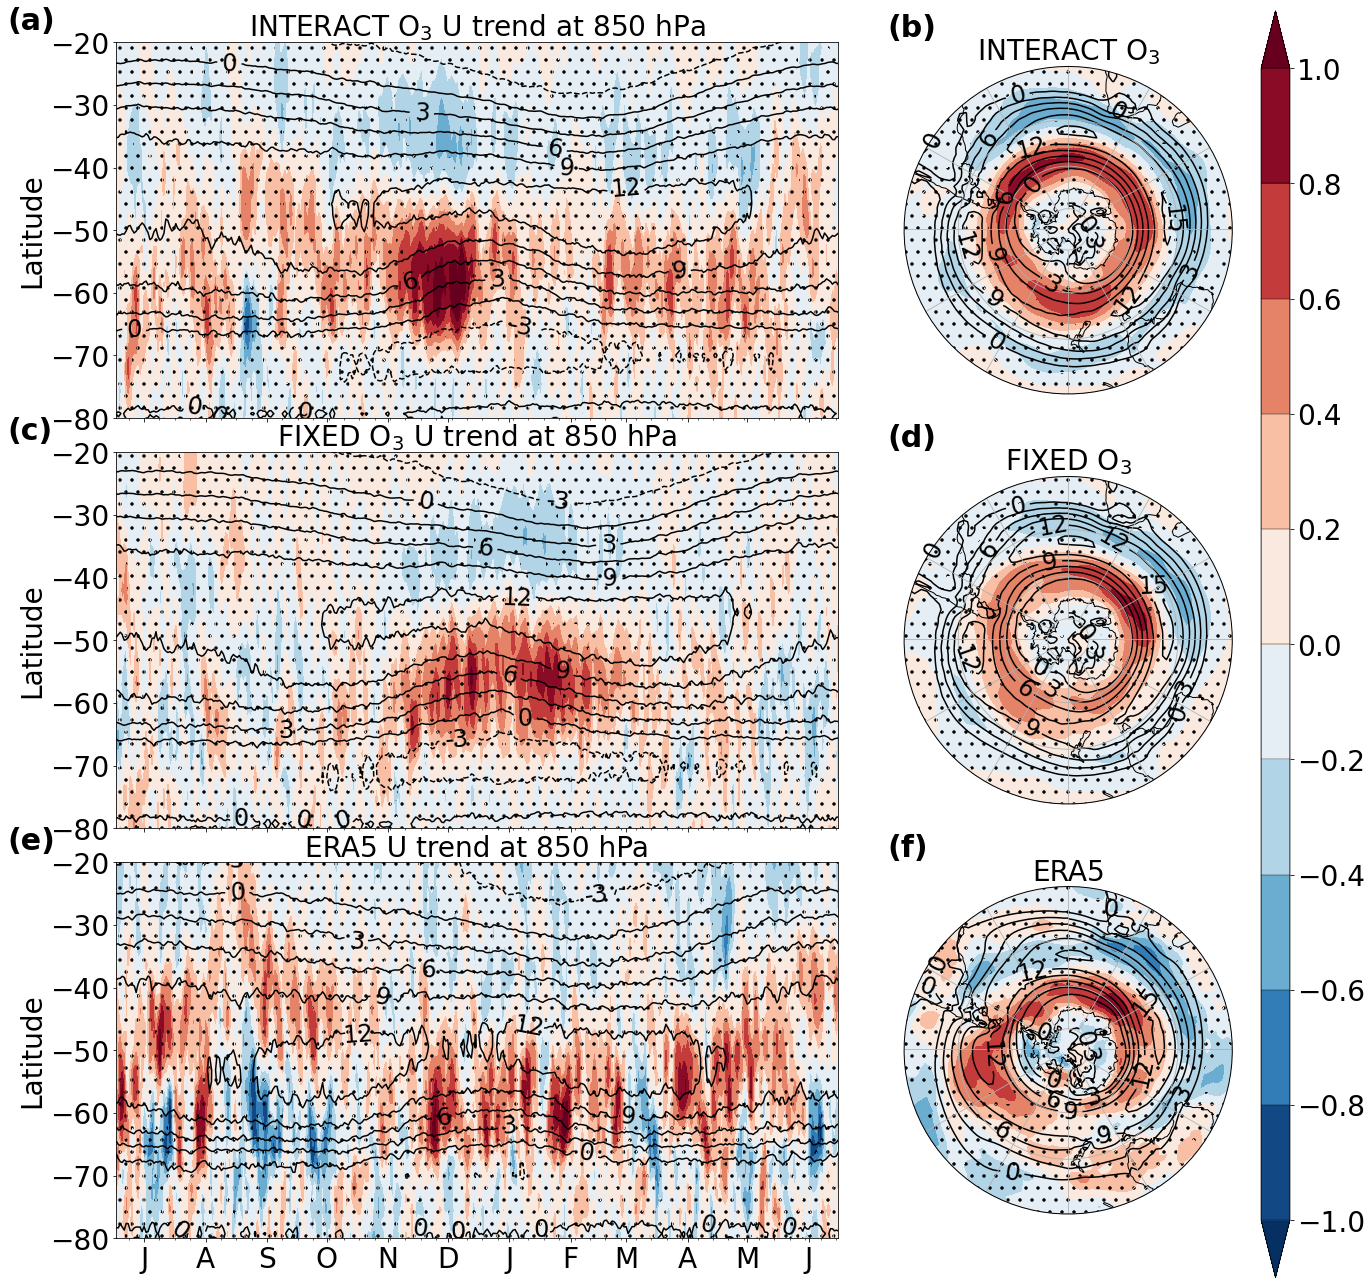

In [36]:
fig = plt.figure(figsize=(20,22))
gs = fig.add_gridspec(4, 3)

cont = np.arange(-1,1.1,0.2)
cont2 = np.arange(-15, 16, 3)

# Chem ON monthly
#ax1 = fig.add_subplot(gs[0:2, :-1]) # this also works
ax1 = plt.subplot2grid((6,3), (0,0), colspan=2, rowspan=2)
con=mon_plev2(moz_trend, moz_signif, moz_mean, cont, cont2, 'INTERACT O$_3$ U trend at 850 hPa')
plt.text(-54,-18, '(a)', fontsize=30, fontweight='bold')
# Chem OFF monthly
ax2 = plt.subplot2grid((6,3), (2,0), colspan=2, rowspan=2)
con=mon_plev2(hist_trend, hist_signif, hist_mean, cont, cont2, 'FIXED O$_3$ U trend at 850 hPa')
plt.text(-54,-18, '(c)', fontsize=30, fontweight='bold')
# ERA monthly
ax5 = plt.subplot2grid((6,3), (4,0), colspan=2, rowspan=2)
con=mon_plev(era_trend, era_signif, era_mean, cont, cont2, 'ERA5 U trend at 850 hPa')
plt.text(-54,-18, '(e)', fontsize=30, fontweight='bold')

# Chem on MAP
cont2 = np.arange(0, 16, 3)
ax3 = plt.subplot2grid((6,3), (0,2), colspan=1, rowspan=2, projection=ccrs.SouthPolarStereo())
polar_plot(moz_trend_map_dj.sel(lat=slice(-18,-90)), moz_sign_map_dj.sel(lat=slice(-18,-90)), \
           moz_mean_map_dj.sel(lat=slice(-18,-90)), cont, cont2, 'INTERACT O$_3$', ax3)
plt.text(-0.05,1.09, '(b)', fontsize=30, fontweight='bold', transform=plt.gca().transAxes)
# Chem OFF MAP
ax4 = plt.subplot2grid((6,3), (2,2), colspan=1, rowspan=2, projection=ccrs.SouthPolarStereo())
polar_plot(hist_trend_map_dj.sel(lat=slice(-18,-90)), hist_sign_map_dj.sel(lat=slice(-18,-90)), \
           hist_mean_map_dj.sel(lat=slice(-18,-90)), cont, cont2, 'FIXED O$_3$', ax4)
plt.text(-0.05,1.09, '(d)', fontsize=30, fontweight='bold', transform=plt.gca().transAxes)
# ERA5 MAP
ax6 = plt.subplot2grid((6,3), (4,2), colspan=1, rowspan=2, projection=ccrs.SouthPolarStereo())
polar_plot(era_trend_map_dj.sel(lat=slice(-18,-90)), era_sign_map_dj.sel(lat=slice(-18,-90)), \
           era_mean_map_dj.sel(lat=slice(-18,-90)), cont, cont2, 'ERA5', ax6)
plt.text(-0.05,1.09, '(f)', fontsize=30, fontweight='bold', transform=plt.gca().transAxes)

cax = plt.axes([0.92, 0.1, 0.02, 0.8])
ticks = np.arange(-1,1.1, 0.2)
c = plt.colorbar(con, ticks=ticks, cax=cax,  drawedges=True)
c.ax.tick_params(labelsize=28)